<p style="align: center;"><img align=center src="https://cdnb.artstation.com/p/assets/covers/images/060/407/559/large/vahid-ghobadi-arfai-vahid-ghobadi-arfai-lo.jpg?1678483232" width=300 height=320/></p>
<h3 style="text-align: center;"><b>Семинар №9 ФЭФМ МФТИ</b></h3>

# Алгоритм Диница

Дан граф, представляющий собой сеть потоков, в которой каждое ребро имеет пропускную способность. Также заданы две вершины — источник «s» и сток «t» — в графе. Найдите максимально возможный поток из s в t при следующих ограничениях:

Поток по кромке не превышает заданную пропускную способность.
Входящий поток равен исходящему для каждой вершины, кроме s и t.

То есть Вы получаете:

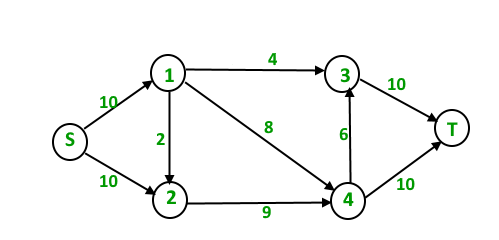

И отдаете после выполнения 19, так как:

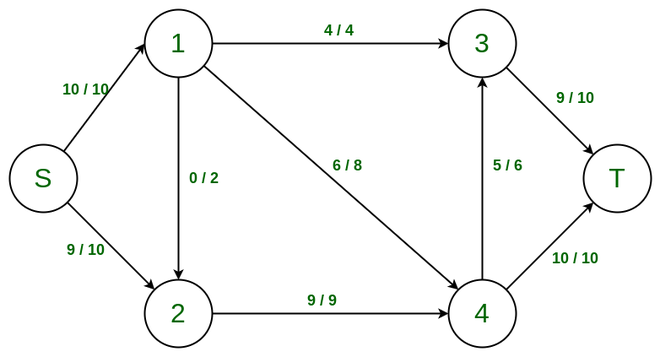

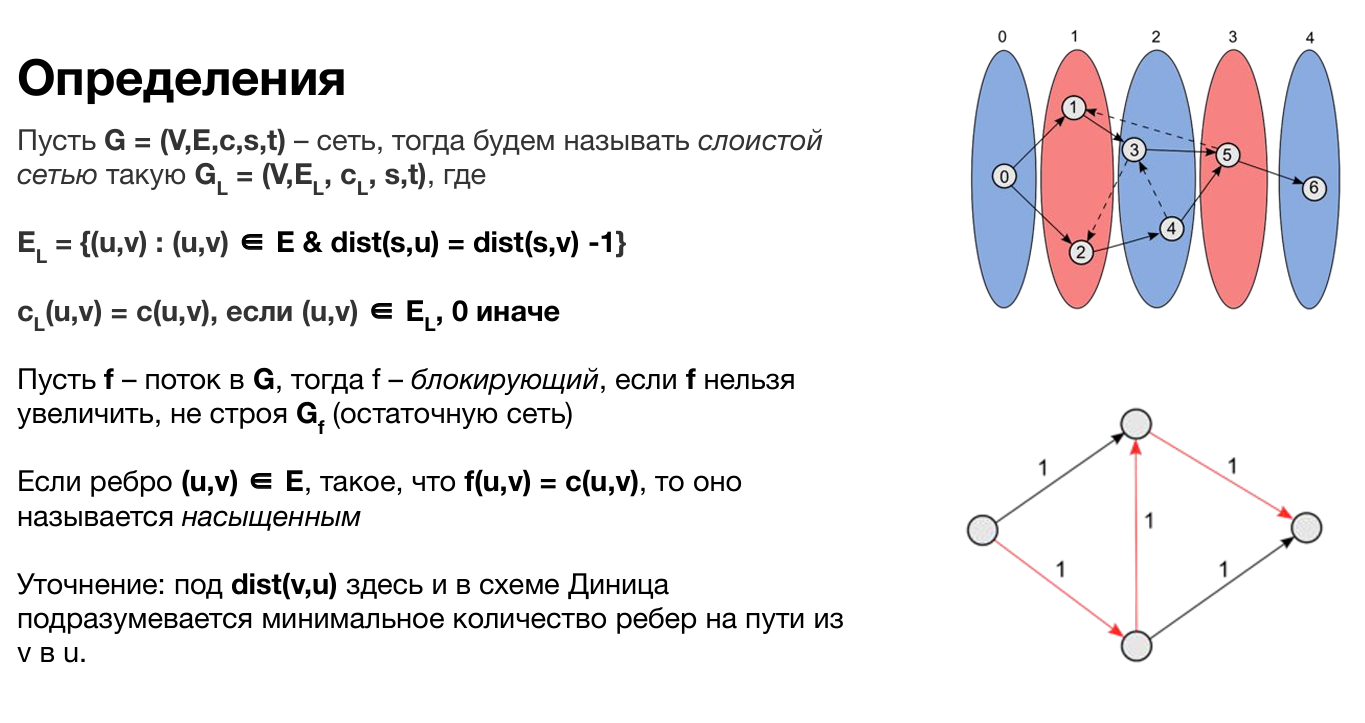

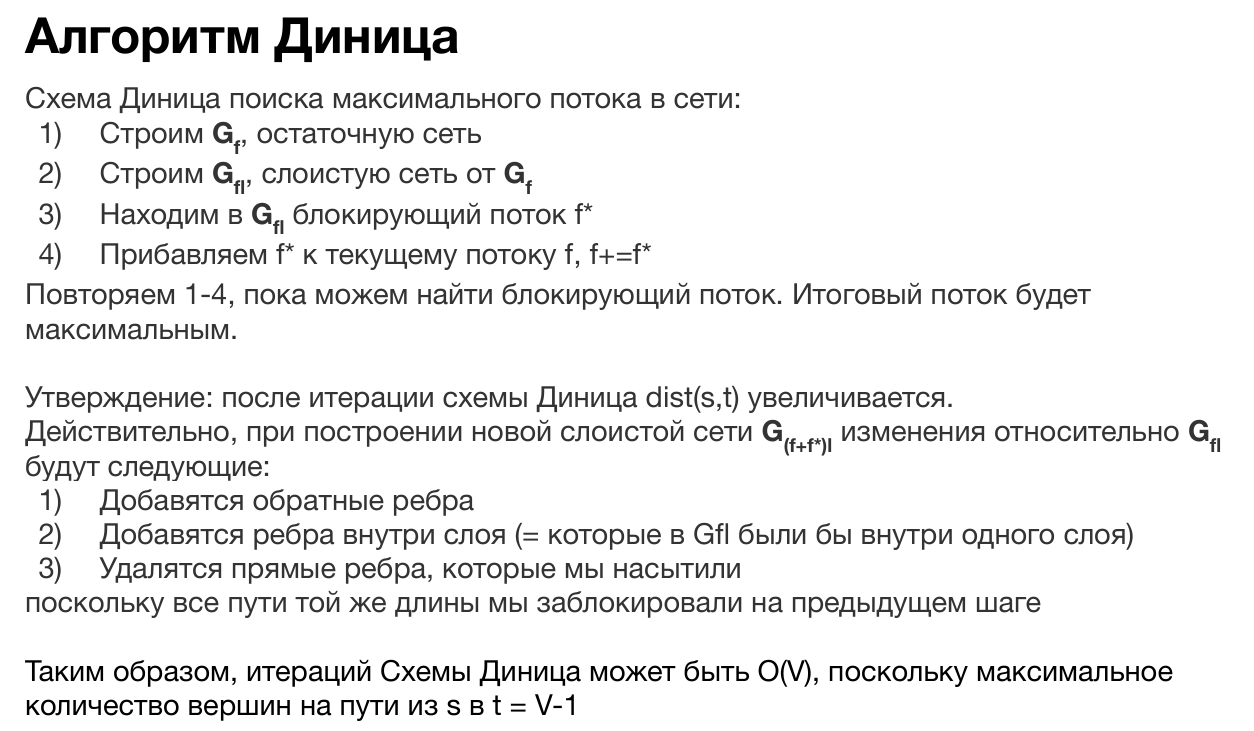

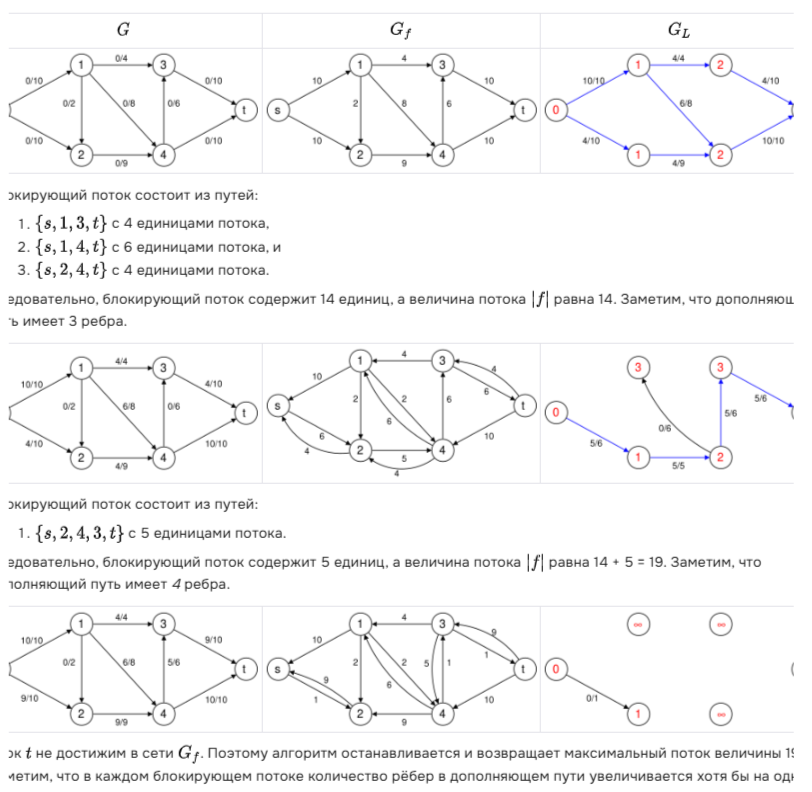

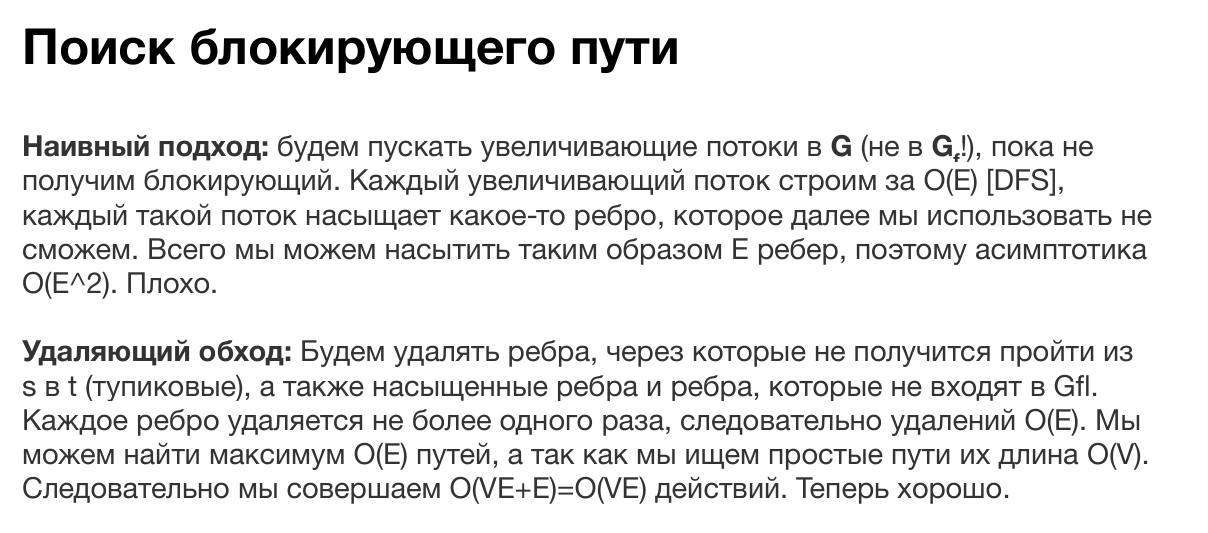

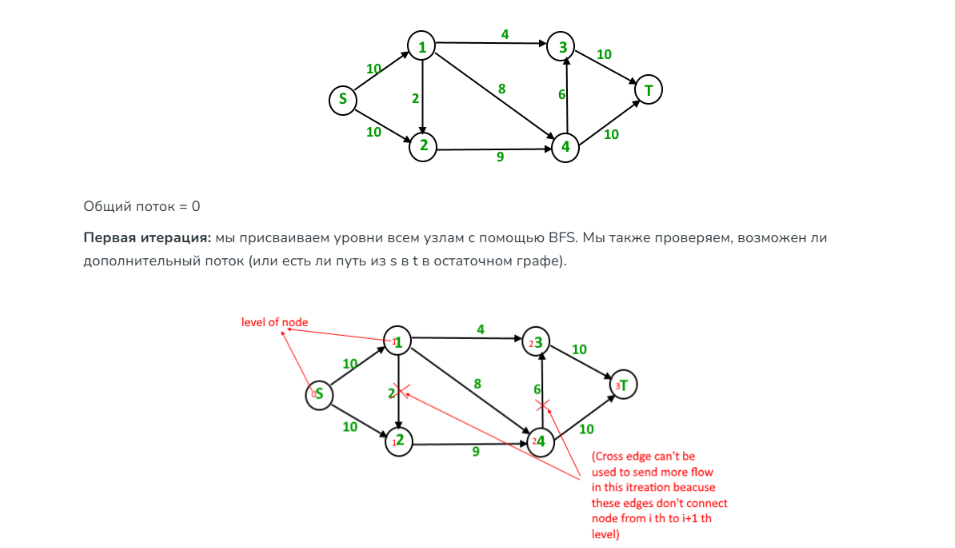

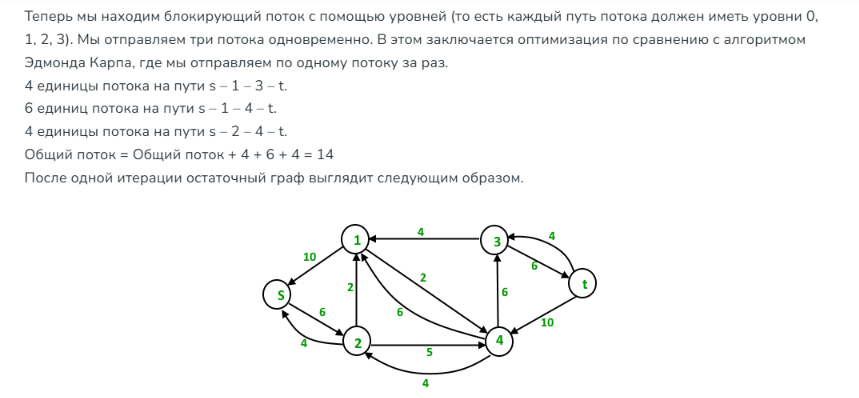

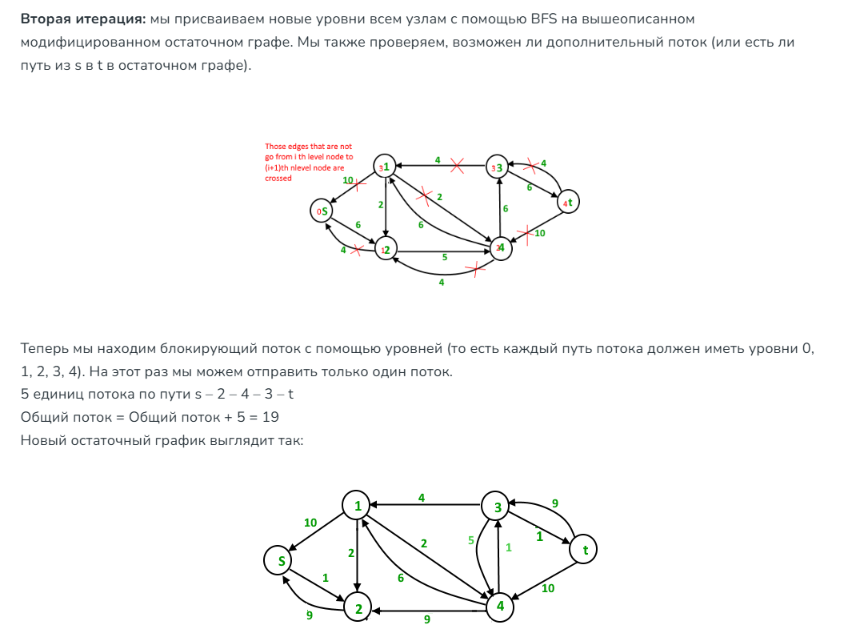

Третья итерация: мы запускаем BFS и создаём граф уровней. Мы также проверяем, возможен ли дополнительный поток, и продолжаем только в том случае, если это возможно. На этот раз в остаточном графе нет пути s-t, поэтому мы завершаем алгоритм.

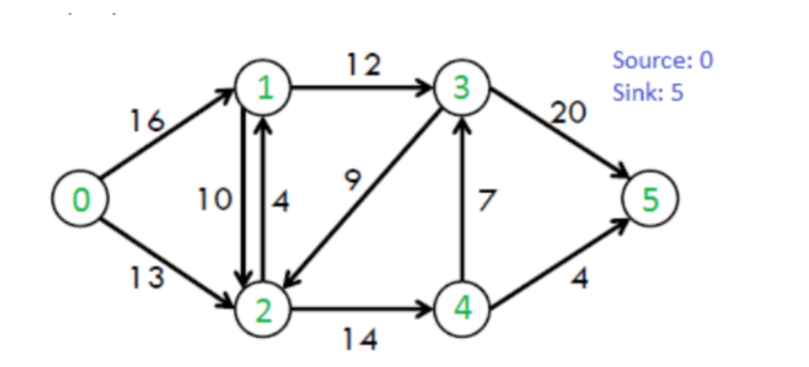

In [11]:
class Edge:
    def __init__(self, v, flow, C, rev):
        self.v = v  # Вершина, в которую ведет ребро
        self.flow = flow  # Текущий поток через ребро
        self.C = C  # Пропускная способность ребра
        self.rev = rev  # Индекс обратного ребра в списке смежности целевой вершины

class Graph:
    def __init__(self, V):
        self.adj = [[] for i in range(V)]  # Список смежности для хранения рёбер
        self.V = V  # Количество вершин в графе
        self.level = [0 for i in range(V)]  # Уровни вершин для BFS

    # Добавление ребра в граф
    def addEdge(self, u, v, C):
        # Прямое ребро: поток 0, пропускная способность C
        a = Edge(v, 0, C, len(self.adj[v]))
        # Обратное ребро: поток 0, пропускная способность 0
        b = Edge(u, 0, 0, len(self.adj[u]))
        self.adj[u].append(a)  # Добавляем прямое ребро в список смежности вершины u
        self.adj[v].append(b)  # Добавляем обратное ребро в список смежности вершины v

    # Поиск в ширину (BFS) для определения уровней вершин
    # и проверки возможности отправки потока от s к t
    def BFS(self, s, t):
        for i in range(self.V):
            self.level[i] = -1  # Инициализируем уровни всех вершин как -1

        self.level[s] = 0  # Уровень исходной вершины равен 0

        # Создаем очередь и добавляем в нее исходную вершину
        q = []
        q.append(s)
        while q:
            u = q.pop(0)  # Извлекаем вершину из очереди
            for i in range(len(self.adj[u])):
                e = self.adj[u][i]
                # Если вершина e.v не посещена и поток через ребро меньше пропускной способности
                if self.level[e.v] < 0 and e.flow < e.C:
                    self.level[e.v] = self.level[u] + 1  # Устанавливаем уровень вершины e.v
                    q.append(e.v)  # Добавляем вершину e.v в очередь

        # Если достигли стока, возвращаем True, иначе False
        return False if self.level[t] < 0 else True

    # Поиск в глубину (DFS) для отправки потока после того, как BFS определил уровни
    # flow: текущий поток, который можно отправить
    # start[]: массив для отслеживания следующего ребра для исследования
    # u: текущая вершина
    # t: сток
    def sendFlow(self, u, flow, t, start):
        if u == t:  # Если достигли стока, возвращаем поток
            return flow

        # Перебираем все ребра из текущей вершины
        while start[u] < len(self.adj[u]):
            e = self.adj[u][start[u]]  # Берем следующее ребро
            # Если уровень следующей вершины на 1 больше текущего и поток через ребро меньше пропускной способности
            if self.level[e.v] == self.level[u] + 1 and e.flow < e.C:
                # Находим минимальный поток от u до t
                curr_flow = min(flow, e.C - e.flow)
                temp_flow = self.sendFlow(e.v, curr_flow, t, start)  # Рекурсивно отправляем поток

                # Если поток больше нуля
                if temp_flow and temp_flow > 0:
                    e.flow += temp_flow  # Увеличиваем поток через текущее ребро
                    self.adj[e.v][e.rev].flow -= temp_flow  # Уменьшаем поток через обратное ребро
                    return temp_flow
            start[u] += 1  # Переходим к следующему ребру

    # Функция для нахождения максимального потока в графе
    def DinicMaxflow(self, s, t):
        if s == t:  # Если источник и сток совпадают, возвращаем -1
            return -1

        total = 0  # Инициализируем общий поток

        # Пока существует путь от источника к стоку
        while self.BFS(s, t) == True:
            start = [0 for i in range(self.V + 1)]  # Инициализируем массив start
            while True:
                flow = self.sendFlow(s, float('inf'), t, start)  # Отправляем поток
                if not flow:  # Если поток равен 0, выходим из цикла
                    break
                total += flow  # Добавляем поток к общему потоку

        return total  

g = Graph(6)
g.addEdge(0, 1, 16)
g.addEdge(0, 2, 13)
g.addEdge(1, 2, 10)
g.addEdge(1, 3, 12)
g.addEdge(2, 1, 4)
g.addEdge(2, 4, 14)
g.addEdge(3, 2, 9)
g.addEdge(3, 5, 20)
g.addEdge(4, 3, 7)
g.addEdge(4, 5, 4)
print("Максимальный поток", g.DinicMaxflow(0, 5))

Максимальный поток 23


In [18]:
class Edge:
    def __init__(self, v, flow, C, rev):
        self.v = v  # Вершина, в которую ведет ребро
        self.flow = flow  # Текущий поток через ребро
        self.C = C  # Пропускная способность ребра
        self.rev = rev  # Индекс обратного ребра в списке смежности целевой вершины

class Graph:
    def __init__(self, V):
        self.adj = [[] for i in range(V)]  
        self.V = V  
        self.level = [0 for i in range(V)]  

    def addEdge(self, u, v, C):
        a = Edge(v, 0, C, len(self.adj[v]))
        b = Edge(u, 0, 0, len(self.adj[u]))
        self.adj[u].append(a)  
        self.adj[v].append(b)  
        
    def BFS(self, s, t):
        for i in range(self.V):
            self.level[i] = -1 
        self.level[s] = 0  
        q = []
        q.append(s)
        while q:
            u = q.pop(0)  
            for i in range(len(self.adj[u])):
                e = self.adj[u][i]
                if self.level[e.v] < 0 and e.flow < e.C:
                    self.level[e.v] = self.level[u] + 1  
                    q.append(e.v)  
        return False if self.level[t] < 0 else True

    def sendFlow(self, u, flow, t, start):
        print(f"\nОтправляем поток из {u}, доступно {flow}")
        if u == t:
            print(f"Достигнут сток! Возвращаем {flow}")
            return flow
    
        for i in range(start[u], len(self.adj[u])):
            e = self.adj[u][i]
            print(f"  Проверяем ребро {u}->{e.v}: flow={e.flow}, cap={e.C}")
            
            if self.level[e.v] == self.level[u] + 1 and e.flow < e.C:
                curr_flow = min(flow, e.C - e.flow)
                print(f"    Можем отправить {curr_flow} (min({flow}, {e.C}-{e.flow}))")
                
                temp_flow = self.sendFlow(e.v, curr_flow, t, start)
                
                if temp_flow > 0:
                    print(f"    Получен поток {temp_flow} из {e.v}!")
                    print(f"    Обновляем:")
                    print(f"      Прямое ребро {u}->{e.v}: flow += {temp_flow} (было {e.flow})")
                    e.flow += temp_flow
                    
                    reverse_edge = self.adj[e.v][e.rev]
                    print(f"      Обратное ребро {e.v}->{reverse_edge.v}: flow -= {temp_flow} (было {reverse_edge.flow})")
                    reverse_edge.flow -= temp_flow
                    
                    return temp_flow
                else:
                    print(f"    Поток не прошёл дальше {e.v}")
            else:
                print(f"    Пропускаем (не подходит уровень или ребро заполнено)")
            
            start[u] += 1
        
        print(f"  Все рёбра из {u} обработаны, поток = 0")
        return 0

    
    def DinicMaxflow(self, s, t):
        if s == t:  
            return -1

        total = 0
        
        while self.BFS(s, t) == True:
            start = [0 for i in range(self.V + 1)]  
            while True:
                flow = self.sendFlow(s, float('inf'), t, start) 
                if not flow:  
                    break
                total += flow
                print(f" {total} ")

        return total  

g = Graph(6)
g.addEdge(0, 1, 16)
g.addEdge(0, 2, 13)
g.addEdge(1, 2, 10)
g.addEdge(1, 3, 12)
g.addEdge(2, 1, 4)
g.addEdge(2, 4, 14)
g.addEdge(3, 2, 9)
g.addEdge(3, 5, 20)
g.addEdge(4, 3, 7)
g.addEdge(4, 5, 4)
print("Максимальный поток", g.DinicMaxflow(0, 5))


Отправляем поток из 0, доступно inf
  Проверяем ребро 0->1: flow=0, cap=16
    Можем отправить 16 (min(inf, 16-0))

Отправляем поток из 1, доступно 16
  Проверяем ребро 1->0: flow=0, cap=0
    Пропускаем (не подходит уровень или ребро заполнено)
  Проверяем ребро 1->2: flow=0, cap=10
    Пропускаем (не подходит уровень или ребро заполнено)
  Проверяем ребро 1->3: flow=0, cap=12
    Можем отправить 12 (min(16, 12-0))

Отправляем поток из 3, доступно 12
  Проверяем ребро 3->1: flow=0, cap=0
    Пропускаем (не подходит уровень или ребро заполнено)
  Проверяем ребро 3->2: flow=0, cap=9
    Пропускаем (не подходит уровень или ребро заполнено)
  Проверяем ребро 3->5: flow=0, cap=20
    Можем отправить 12 (min(12, 20-0))

Отправляем поток из 5, доступно 12
Достигнут сток! Возвращаем 12
    Получен поток 12 из 5!
    Обновляем:
      Прямое ребро 3->5: flow += 12 (было 0)
      Обратное ребро 5->3: flow -= 12 (было 0)
    Получен поток 12 из 3!
    Обновляем:
      Прямое ребро 1->3: flow += 

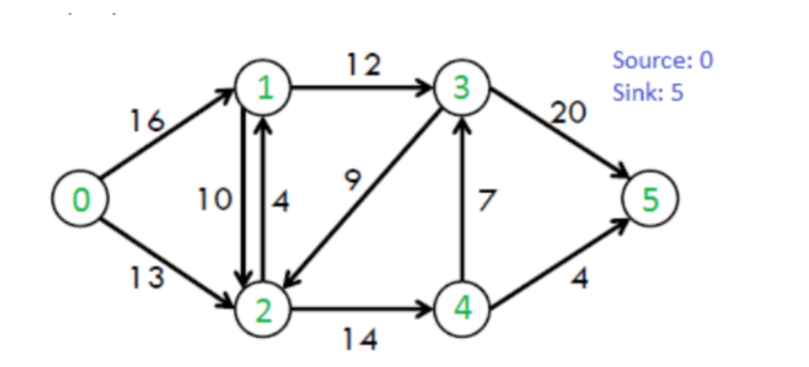

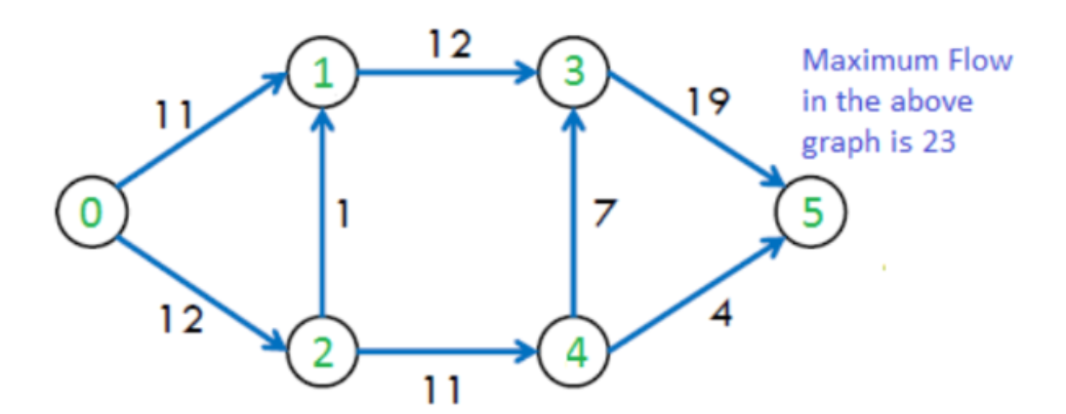

В методе BFS() условие e.flow < e.C автоматически отсекает обратные рёбра, так как у них C = 0

# Паросочетания

## Алгоритм Форда-Фалкерсона

Паросочетание в двудольном графе — это набор рёбер, выбранных таким образом, что никакие два ребра не имеют общей конечной точки. Максимальное паросочетание — это паросочетание максимального размера (максимального количества рёбер). Если к максимальному паросочетанию добавить какое-либо ребро, оно перестанет быть паросочетанием. Для заданного двудольного графа может существовать несколько максимальных паросочетаний.

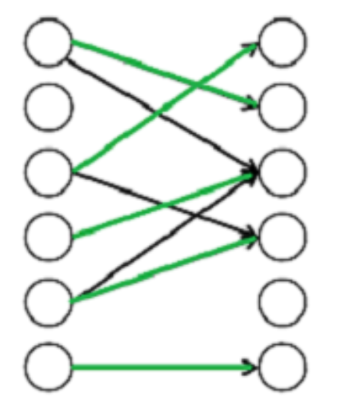

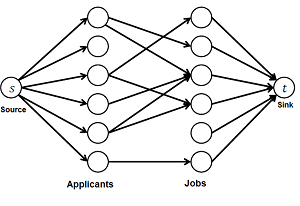

Пропускная способность каждого ребра равна 1 единице.

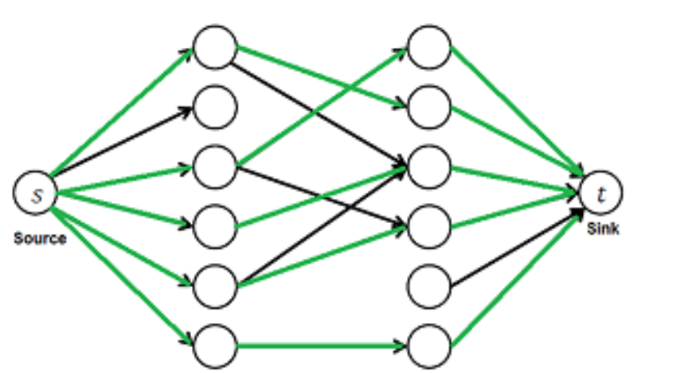

мы используем алгоритм Форда-Фалкерсона для поиска максимального потока в сети. Максимальный поток — это и есть искомое значение

In [33]:
from collections import deque

class FordFulkerson:
    def __init__(self, graph):
        self.graph = graph  # Матрица смежности двудольного графа
        self.X = len(graph)  # Количество вершин в множестве X
        self.Y = len(graph[0])  # Количество вершин в множестве Y
        self.source = self.X + self.Y  # Источник
        self.sink = self.X + self.Y + 1  # Сток
        self.size = self.X + self.Y + 2  # Размер сети

        # Построение остаточного графа
        self.residual_graph = [[0] * self.size for i in range(self.size)]

        # Соединяем источник с вершинами множества X
        for i in range(self.X):
            self.residual_graph[self.source][i] = 1

        # Соединяем вершины X с вершинами Y
        for i in range(self.X):
            for j in range(self.Y):
                if self.graph[i][j]:  # Если есть ребро
                    self.residual_graph[i][self.X + j] = 1

        # Соединяем вершины Y со стоком
        for j in range(self.Y):
            self.residual_graph[self.X + j][self.sink] = 1

    def bfs(self, parent):
        """Поиск увеличивающего пути с использованием BFS"""
        visited = [False] * self.size
        queue = deque([self.source])
        visited[self.source] = True

        while queue:
            u = queue.popleft()
            for v in range(self.size):
                if not visited[v] and self.residual_graph[u][v] > 0:
                    queue.append(v)
                    visited[v] = True
                    parent[v] = u
                    if v == self.sink:
                        return True
        return False

    def ford_fulkerson(self):
        """Алгоритм Форда-Фалкерсона для максимального паросочетания"""
        parent = [-1] * self.size
        max_matching = 0

        while self.bfs(parent):
            # Найдем минимальную пропускную способность на найденном пути
            v = self.sink
            path_flow = float('Inf')
            while v != self.source:
                u = parent[v]
                path_flow = min(path_flow, self.residual_graph[u][v])
                v = u

            # Обновим остаточный граф
            v = self.sink
            while v != self.source:
                u = parent[v]
                self.residual_graph[u][v] -= path_flow
                self.residual_graph[v][u] += path_flow
                v = u

            max_matching += path_flow  # Увеличиваем счетчик паросочетаний

        return max_matching


# Пример графа (X -> Y)
graph = [[0, 1, 1, 0, 0, 0],
         [1, 0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1]]

ff = FordFulkerson(graph)
print("Максимальное паросочетание:", ff.ford_fulkerson())

Максимальное паросочетание: 5


Примечание!

## Алгоритм Хопкрофта-Карпа

Этот алгоритм быстрее, чем Форда-Фалкерсона, потому что использует многократный поиск увеличивающих путей с помощью BFS и DFS, а не один за раз.

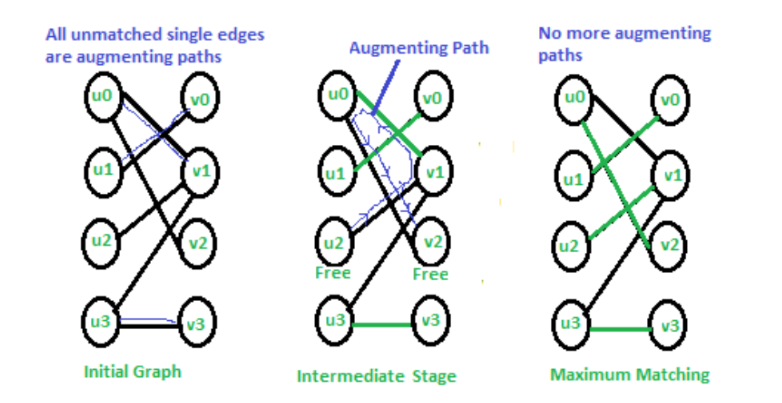

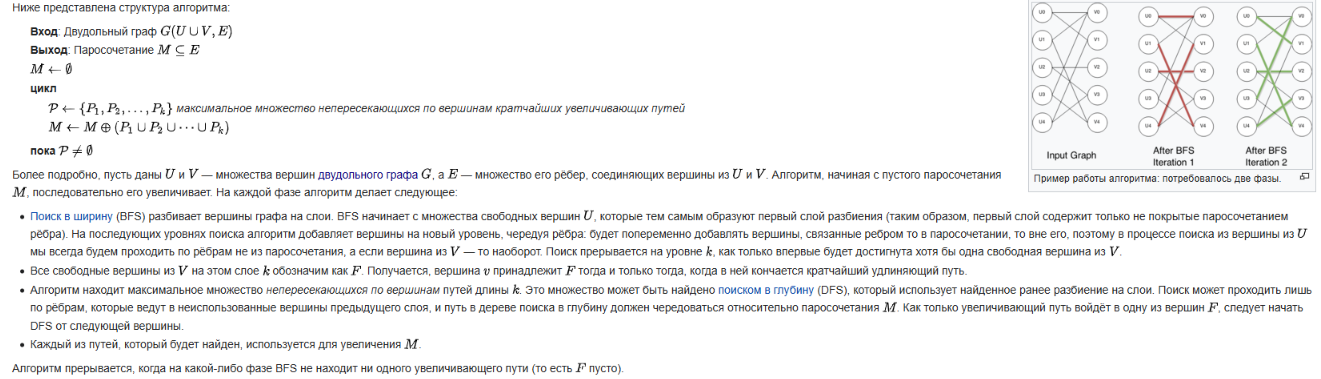

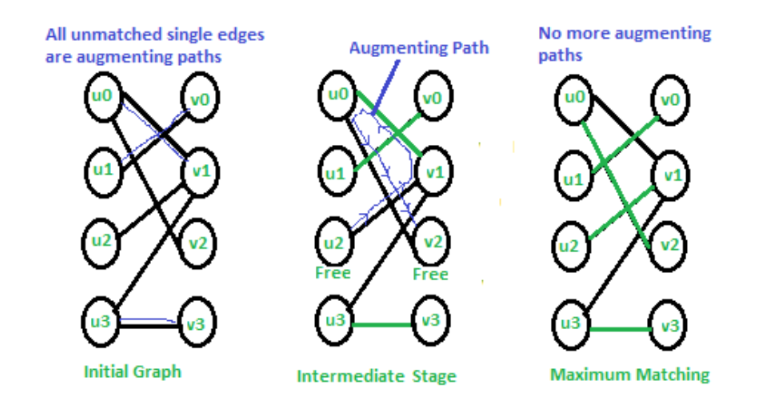

In [ ]:
BFS:

Находит кратчайшие пути из свободных вершин X

Обновляет расстояния до вершин

Возвращает True, если существует путь до стока

DFS:

Рекурсивно ищет увеличивающий путь

Обновляет паросочетание, если путь найден

Основной алгоритм (hopcroftKarpFlow):

Инициализирует паросочетания (pairU, pairV) как пустые

Пока BFS находит увеличивающие пути:

Для каждой свободной вершины X пытается найти увеличивающий путь через DFS

Увеличивает счётчик паросочетаний при успехе

self.residual_graph[u][self.x_size + v] > 0: проверяет, существует ли в остаточной сети (residual_graph) ненулевой поток по ребру из вершины u в X в вершину v в Y.

In [1]:
from collections import deque

INF = float('inf')

class hopcroftKarp:
    def __init__(self, x_size, y_size, edges):
        self.x_size = x_size
        self.y_size = y_size
        self.size = x_size + y_size
        
        self.residual_graph = [[0] * self.size for i in range(self.size)]
        
        for x, y in edges:
            self.residual_graph[x][x_size + y] = 1
        
        
    def bfs(self, dist, pairU, pairV, iteration):
        print(f"\nИтерация {iteration}: BFS строит слоистый граф")
        queue = deque()
        for u in range(self.x_size):
            if pairU[u] == -1:
                dist[u] = 0
                queue.append(u)
                print(f"  Вершина {u} свободна, добавляем в очередь")
            else:
                dist[u] = INF
        
        found_free = False
        while queue:
            u = queue.popleft()
            for v in range(self.y_size):
                if self.residual_graph[u][self.x_size + v] > 0:
                    if pairV[v] == -1:
                        found_free = True
                    else:
                        next_u = pairV[v]
                        if dist[next_u] == INF:
                            dist[next_u] = dist[u] + 1
                            queue.append(next_u)
                            print(f"  Добавляем {next_u} в очередь (из {u} через {v})")
        return found_free

    def dfs(self, u, dist, pairU, pairV):
        for v in range(self.y_size):
            if self.residual_graph[u][self.x_size + v] > 0:
                if pairV[v] == -1:
                    pairV[v] = u
                    pairU[u] = v
                    print(f"  Выбрано ребро ({u}, {v})")
                    return True
                else:
                    next_u = pairV[v]
                    if dist[next_u] == dist[u] + 1 and self.dfs(next_u, dist, pairU, pairV):
                        pairV[v] = u
                        pairU[u] = v
                        print(f"  Переназначено ребро ({u}, {v})")
                        return True
        dist[u] = INF
        return False
    
    def hopcroftKarp(self):
        pairU = [-1] * self.x_size
        pairV = [-1] * self.y_size
        dist = [INF] * self.x_size
        
        max_matching = 0
        iteration = 1  
        
        while self.bfs(dist, pairU, pairV, iteration):
            print(f"\nИтерация {iteration}: DFS ищет увеличивающие пути")
            for u in range(self.x_size):
                if pairU[u] == -1 and self.dfs(u, dist, pairU, pairV):
                    max_matching += 1
            iteration += 1
        
        print("\nФинальное паросочетание:")
        for u in range(self.x_size):
            if pairU[u] != -1:
                print(f"  ({u}, {pairU[u]})")
        return max_matching

X_size = 4
Y_size = 4
edges = [(0, 1), (0, 2), (1, 0), (2, 1), (3, 1), (3, 3)]

hk_flow = hopcroftKarp(X_size, Y_size, edges)
print("Максимальное паросочетание:", hk_flow.hopcroftKarp())


Итерация 1: BFS строит слоистый граф
  Вершина 0 свободна, добавляем в очередь
  Вершина 1 свободна, добавляем в очередь
  Вершина 2 свободна, добавляем в очередь
  Вершина 3 свободна, добавляем в очередь

Итерация 1: DFS ищет увеличивающие пути
  Выбрано ребро (0, 1)
  Выбрано ребро (1, 0)
  Выбрано ребро (3, 3)

Итерация 2: BFS строит слоистый граф
  Вершина 2 свободна, добавляем в очередь
  Добавляем 0 в очередь (из 2 через 1)

Итерация 2: DFS ищет увеличивающие пути
  Выбрано ребро (0, 2)
  Переназначено ребро (2, 1)

Итерация 3: BFS строит слоистый граф

Финальное паросочетание:
  (0, 2)
  (1, 0)
  (2, 1)
  (3, 3)
Максимальное паросочетание: 4


# Контест

## Задача D

Вам надо уничтожить такое количество дорог, чтобы образовалось хотя бы два города, проезд между которыми был бы невозможен. 
Вам известна стоимость уничтожения каждой дороги. Найти наименьшую стоимость, необходимую для совершения задуманного.

Формат ввода


В первой строке содержится t -- количество тестов. Первая строка каждого теста содержит количество n (n ≤ 50) городов в стране. Следующие n строк описывают дороги: j-ый символ i-ой строки является цифрой, задающей стоимость уничтожения дороги, ведущей из i-го города в j-ый.

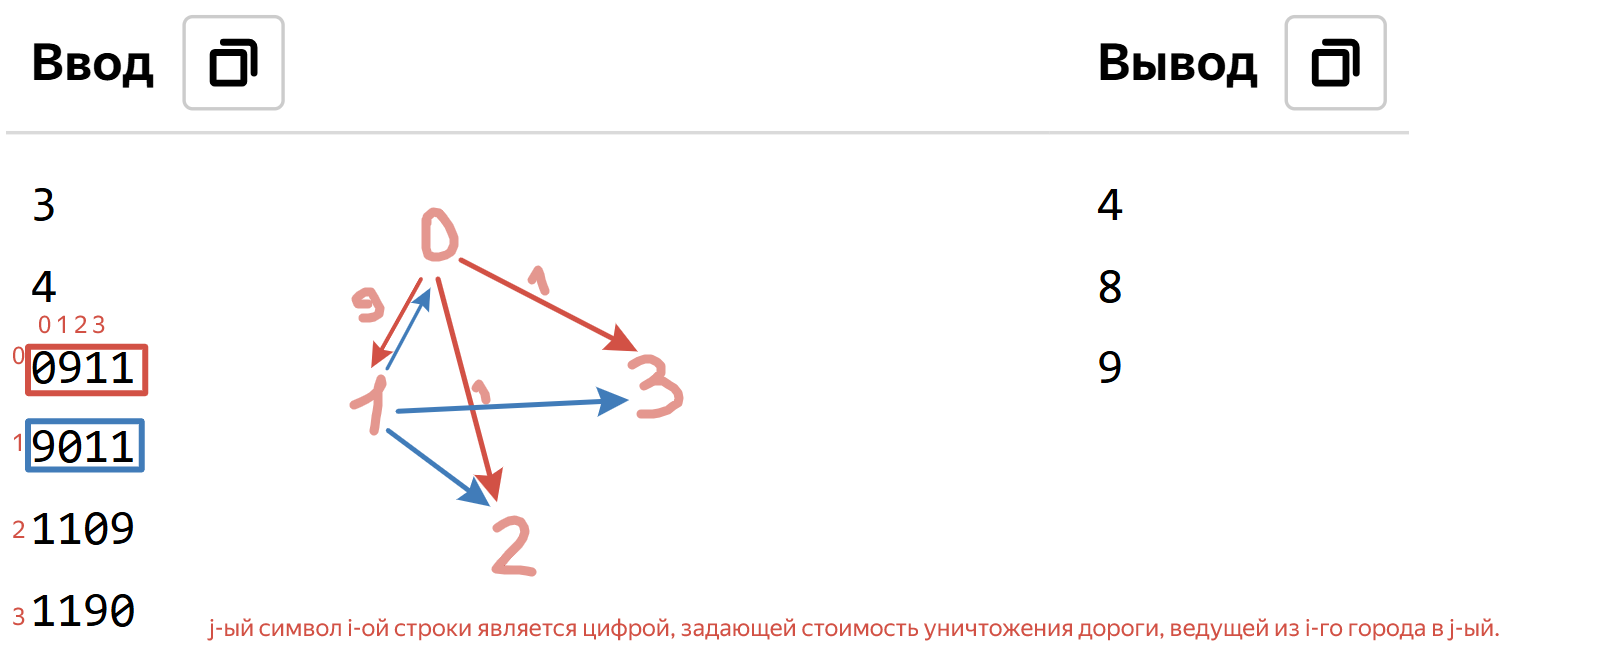

построим все дороги

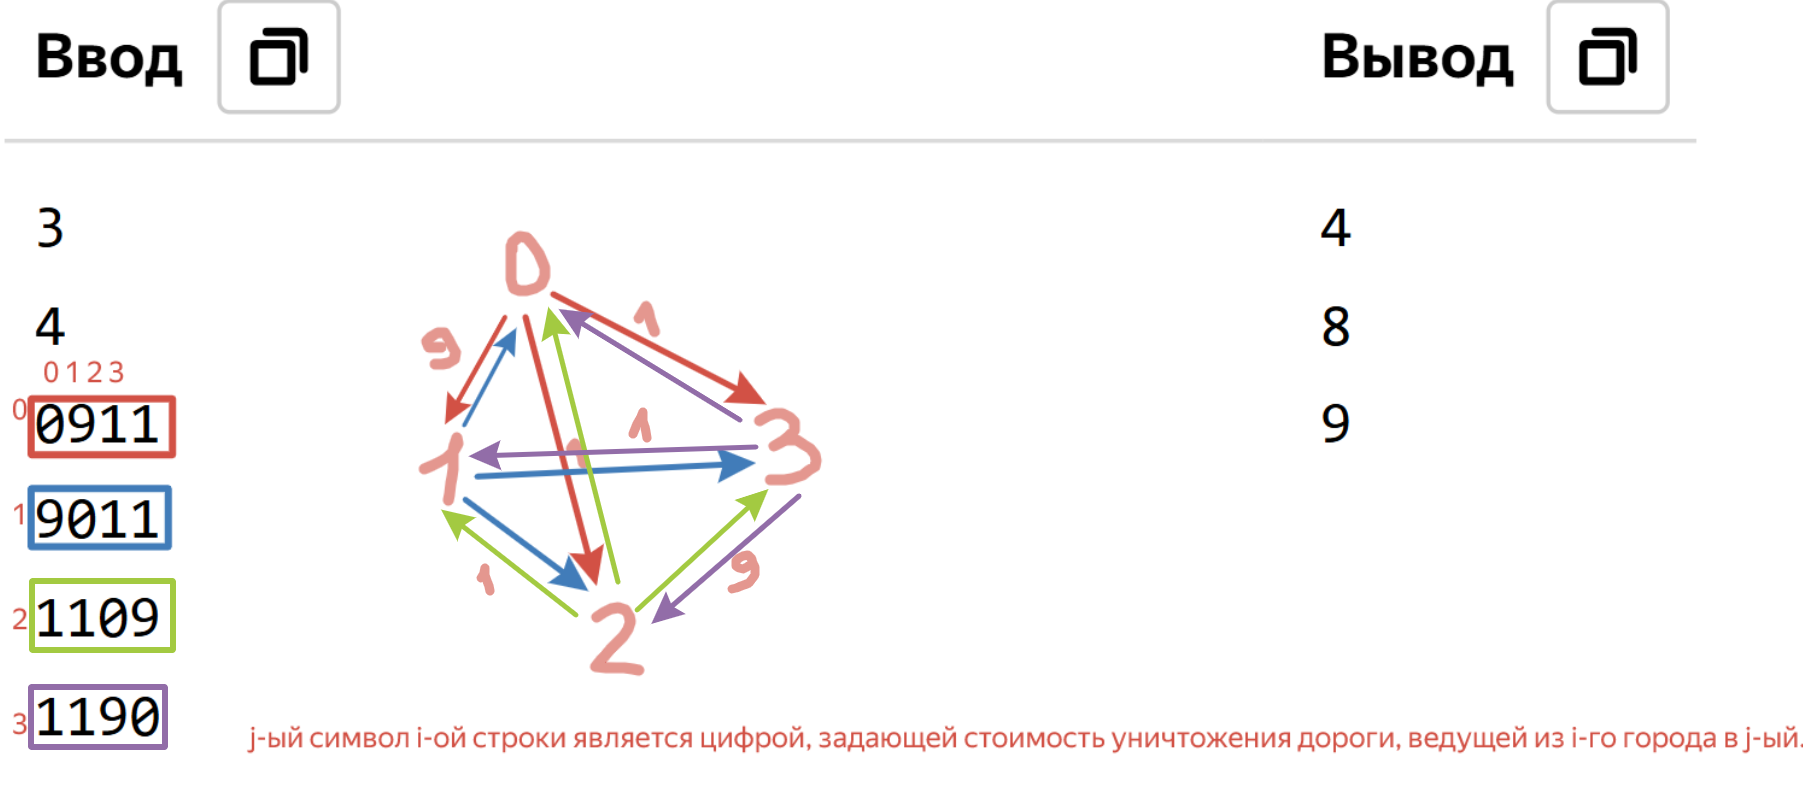

какие дороги нужно разрушить?

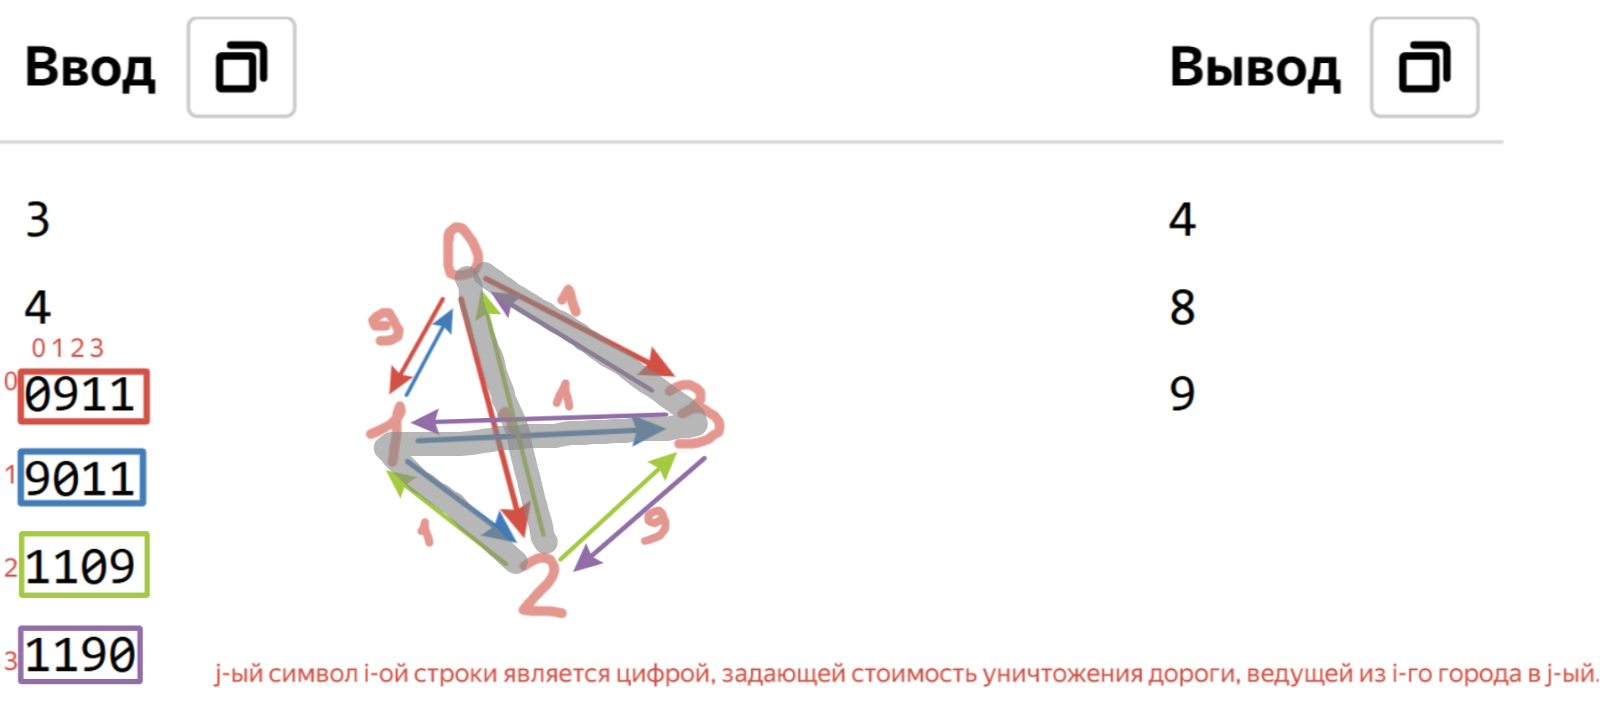

Формат вывода


Для каждого теста вывести в отдельной строке ответ.

### Фактически задача - поиск мостов наименьшего веса

In [ ]:
3
4
0911
9011
1109
1190
6
030900
304120
040174
911021
027207
004170
4
0399
3033
9309
9390

# Строки, начало

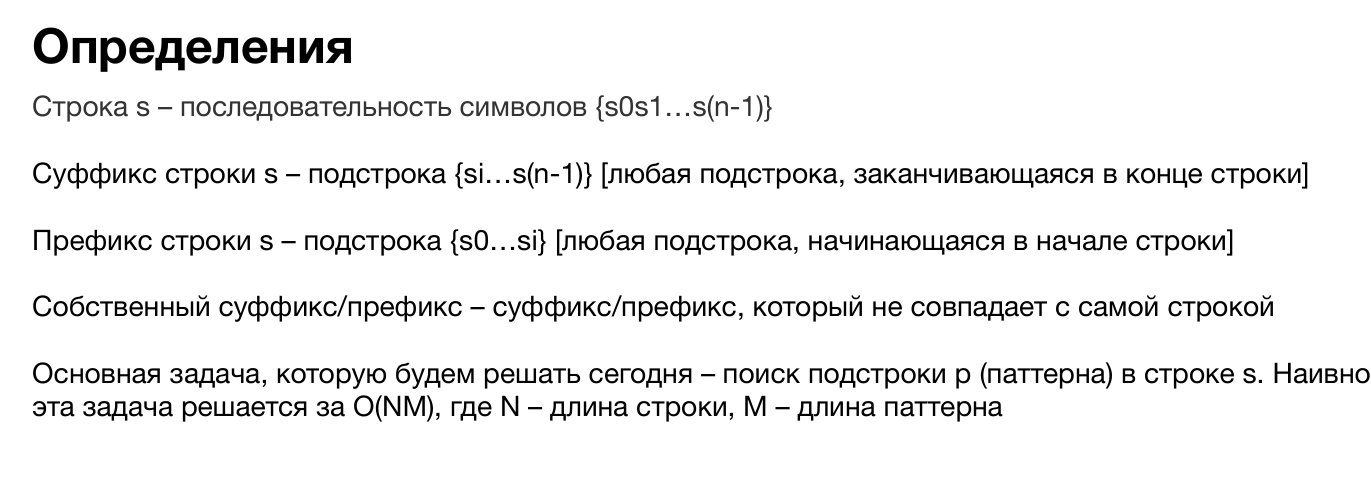

Префикс — это начало строки. Например, для "abcdef" префиксы:

"a",

"ab",

"abc",

"abcd" и так далее.

Постфикс (чаще говорят суффикс) — это конец строки. Например, для "abcdef" суффиксы:

"f",

"ef",

"def",

"cdef" и так далее.

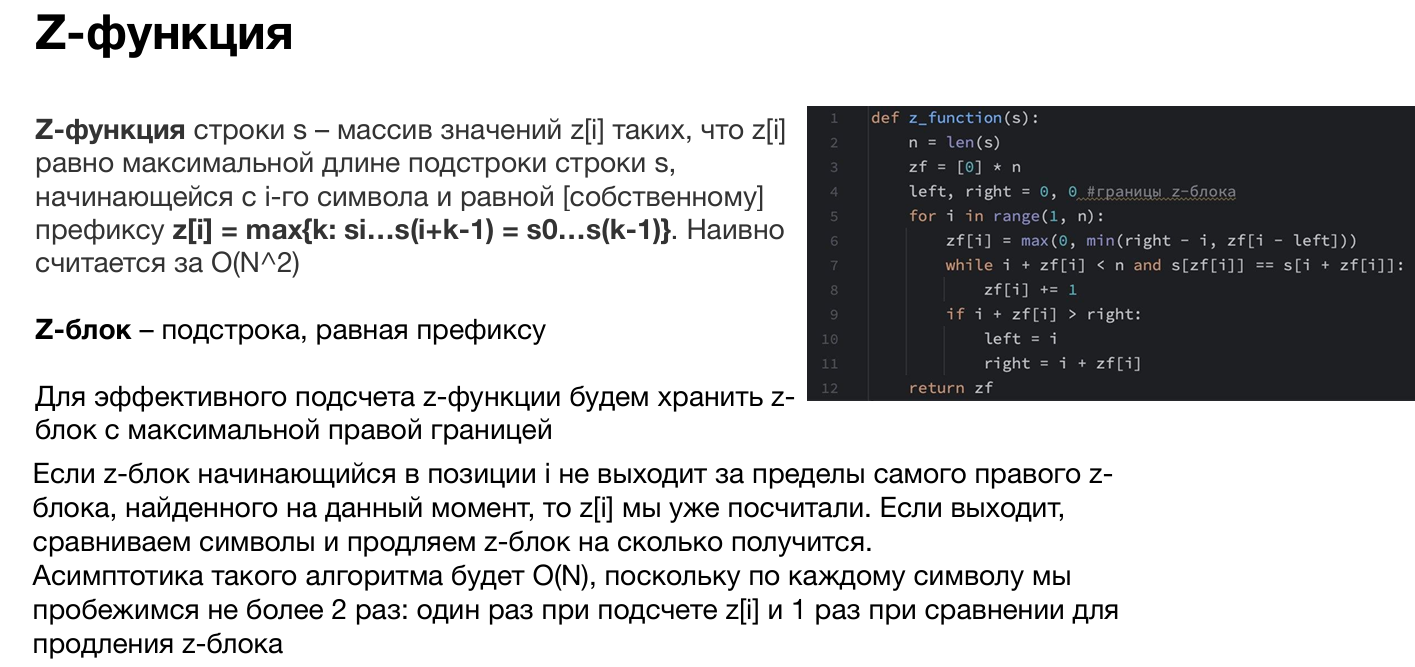

Здесь и далее строки индексируются с нуля, т.е. первый символ строки имеет номер 0
. Также, здесь и далее s[i…j]
 обозначает подстроку строки s
 от i
-го символа до j
-го включительно.

Пусть дана строка s
 длины n
. Тогда Z(s)
 - это массив длины n
, i
-ый элемент которого равен наибольшему числу символов, начиная с позиции i
, совпадающих с первыми символами строки s
.

Иными словами, z[i]
 — это длина наибольшего общего префикса строки s
 и её i
-го суффикса.

Первый элемент Z
-функции, z[0]
, обычно считают неопределённым. Мы будем считать, что он равен нулю (хотя ни в алгоритме, ни в приведённой реализации это ничего не меняет).

Далее будет привиден алгоритм вычисления Z
-функции за время O(n)
, а также различные применения этого алгоритма.

In [41]:
def z_func(s, n):
    z = [0] * n
    l, r = 0, 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

s = "aaabaab"
n = len(s)
print(z_func(s, n))

[0, 2, 1, 0, 2, 1, 0]


In [43]:
s = "aabcaabxaaaz"
n = len(s)
print(z_func(s, n))

[0, 1, 0, 0, 3, 1, 0, 0, 2, 2, 1, 0]


### Поиск подстроки в строке с использованием Z-функции

In [53]:
def z_func(s):
    n = len(s)
    z = [0] * n
    l, r = 0, 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

def search_pattern(text, pattern):
    combined = pattern + "#" + text  # Объединяем паттерн и текст через #
    z = z_func(combined)
    pattern_length = len(pattern)
    result = []

    # Проходим по z-значениям после паттерна и #
    for i in range(pattern_length + 1, len(z)):
        if z[i] == pattern_length:  # Если z[i] == длине паттерна, нашли совпадение
            result.append(i - pattern_length - 1)

    return result

text = "aaabaabaaab"
pattern = "aab"

positions = search_pattern(text, pattern)
print("Паттерн найден в позициях:", positions)

Паттерн найден в позициях: [1, 4, 8]


### Переодичность в строке

Определение периодичности строки с помощью Z-функции основано на том, что если строка имеет период p, то Z[n - p] = p.

In [64]:
def z_func(s):
    n = len(s)
    z = [0] * n
    l, r = 0, 0
    for i in range(1, n):
        if i <= r:
            z[i] = min(r - i + 1, z[i - l])
        while i + z[i] < n and s[z[i]] == s[i + z[i]]:
            z[i] += 1
        if i + z[i] - 1 > r:
            l, r = i, i + z[i] - 1
    return z

def find_period(s):
    n = len(s)
    z = z_func(s)
    
    for p in range(1, n):  # Проверяем возможные длины периода
        if n % p == 0 and z[p] == n - p:  # Условие на кратность и Z-функцию
            return p
    return n  # Если нет меньшего периода, строка сама себе период

s1 = "ababab"
s2 = "aaaa"
s3 = "abcabcabc"

print(f"Минимальный период '{s1}':", find_period(s1))  
print(f"Минимальный период '{s2}':", find_period(s2)) 
print(f"Минимальный период '{s3}':", find_period(s3))  

Минимальный период 'ababab': 2
Минимальный период 'aaaa': 1
Минимальный период 'abcabcabc': 3


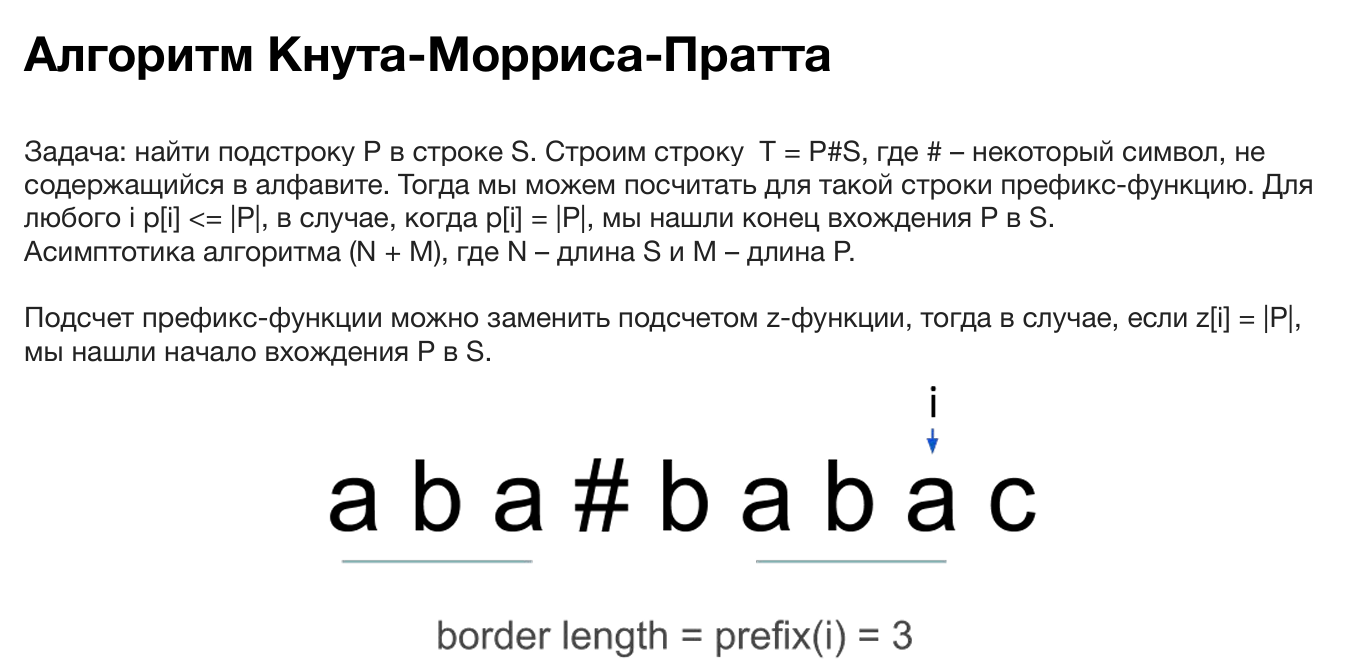

Префикс-функция π[i] для строки s показывает длину наибольшего собственного префикса, который также является суффиксом подстроки s[0:i].

π[2] = 1, потому что "a" совпадает с "a" в начале

π[3] = 2, потому что "ab" совпадает с "ab" в начале

π[4] = 0, потому что "ab" не равно "bc"

In [74]:
def prefix_function(s):
    n = len(s)
    pi = [0] * n  # Массив π-функции
    for i in range(1, n):
        j = pi[i - 1]  # Длина предыдущего префикса-суффикса
        while j > 0 and s[i] != s[j]:  
            j = pi[j - 1]  # Пытаемся уменьшить длину совпадения
        if s[i] == s[j]:  
            j += 1  # Увеличиваем, если нашли совпадение
        pi[i] = j  # Записываем результат
    return pi


s1 = "ababcab"

print(f"prefix_function '{s1}':", prefix_function(s1))  
print(f"z_func '{s1}':", z_func(s1))  

prefix_function 'ababcab': [0, 0, 1, 2, 0, 1, 2]
z_func 'ababcab': [0, 0, 2, 0, 0, 2, 0]


In [72]:
def prefix_function(s):
    n = len(s)
    pi = [0] * n  # Массив π-функции
    for i in range(1, n):
        j = pi[i - 1]  # Длина предыдущего префикса-суффикса
        while j > 0 and s[i] != s[j]:  
            j = pi[j - 1]  # Пытаемся уменьшить длину совпадения
        if s[i] == s[j]:  
            j += 1  # Увеличиваем, если нашли совпадение
        pi[i] = j  # Записываем результат
    return pi


s1 = "ababab"
s2 = "aaaa"
s3 = "abcabcabc"

print(f"prefix_function '{s1}':", prefix_function(s1))  
print(f"prefix_function '{s2}':", prefix_function(s2)) 
print(f"prefix_function '{s3}':", prefix_function(s3))  
print(f"z_func '{s1}':", z_func(s1))  
print(f"z_func '{s2}':", z_func(s2)) 
print(f"z_func '{s3}':", z_func(s3)) 

prefix_function 'ababab': [0, 0, 1, 2, 3, 4]
prefix_function 'aaaa': [0, 1, 2, 3]
prefix_function 'abcabcabc': [0, 0, 0, 1, 2, 3, 4, 5, 6]
z_func 'ababab': [0, 0, 4, 0, 2, 0]
z_func 'aaaa': [0, 3, 2, 1]
z_func 'abcabcabc': [0, 0, 0, 6, 0, 0, 3, 0, 0]


In [76]:
def prefix_function(s):
    n = len(s)
    pi = [0] * n
    for i in range(1, n):
        j = pi[i - 1]
        while j > 0 and s[i] != s[j]:
            j = pi[j - 1]
        if s[i] == s[j]:
            j += 1
        pi[i] = j
    return pi

def kmp_search(text, pattern):
    combined = pattern + "#" + text
    pi = prefix_function(combined)
    pattern_length = len(pattern)
    result = []

    for i in range(pattern_length + 1, len(pi)):
        if pi[i] == pattern_length:
            result.append(i - 2 * pattern_length)

    return result

text = "aaabaabaaab"
pattern = "aab"
positions = kmp_search(text, pattern)
print("Паттерн найден в позициях", positions)

Паттерн найден в позициях [1, 4, 8]


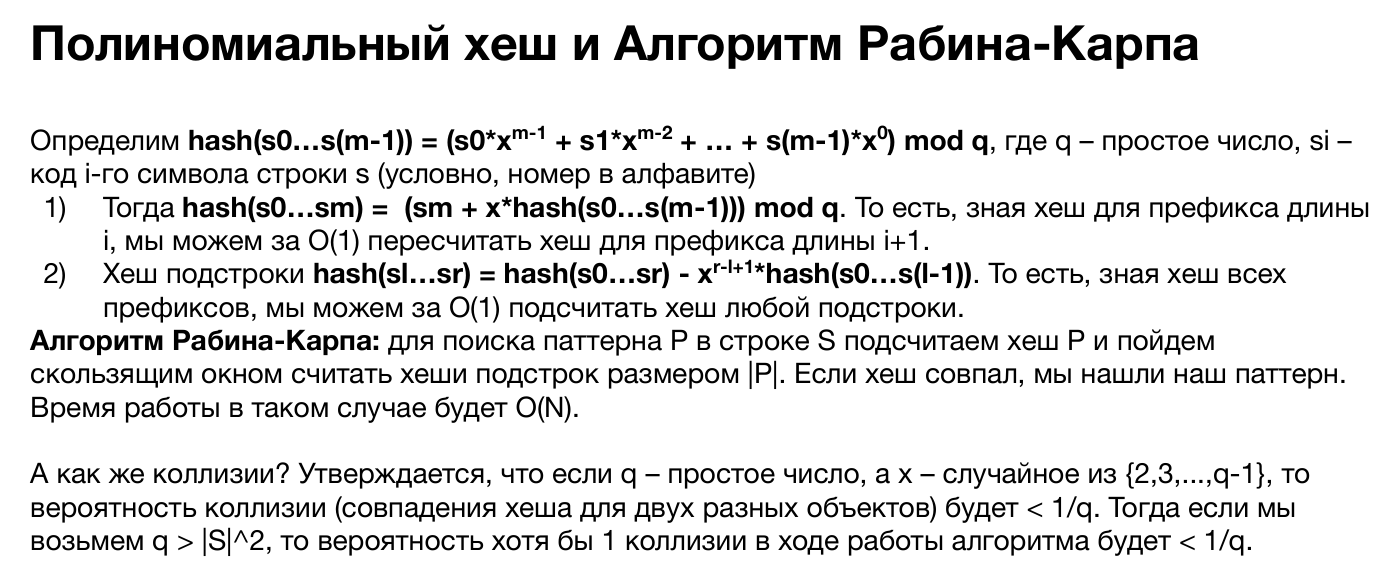

In [78]:
import hashlib

def hash_string(s):
    return hashlib.sha256(s.encode()).hexdigest()

def find_period_hashlib(s):
    n = len(s)
    for p in range(1, n):  # Перебираем возможные длины периода
        if n % p == 0:  # Период возможен только если длина делится на p
            base_hash = hash_string(s[:p])  # Хеш первой подстроки длины p
            ok = True
            
            for i in range(p, n, p):  # Проверяем, совпадают ли все части
                if hash_string(s[i:i + p]) != base_hash:
                    ok = False
                    break
            
            if ok:
                return p  # Нашли минимальный период

    return n  # Если нет меньшего периода, строка сама себе период

print(find_period_hashlib("ababab"))  
print(find_period_hashlib("aaaaaa"))    
print(find_period_hashlib("abcabcabc"))   
print(find_period_hashlib("abcdef")) 

2
1
3
6


In [80]:
import hashlib

def hash_string(s):
    return hashlib.sha256(s.encode()).hexdigest()

def kmp_hashlib_search(text, pattern):
    n, m = len(text), len(pattern)
    pattern_hash = hash_string(pattern)  # Хеш паттерна
    result = []

    for i in range(n - m + 1):  # Перебираем все возможные сдвиги
        if hash_string(text[i:i + m]) == pattern_hash:
            if text[i:i + m] == pattern:  # Дополнительная проверка (на случай коллизий)
                result.append(i)

    return result

text = "aaabaabaaab"
pattern = "aab"
positions = kmp_hashlib_search(text, pattern)
print("Паттерн найден в позициях", positions)

Паттерн найден в позициях [1, 4, 8]


## Алгоритм Ахо-Корасика

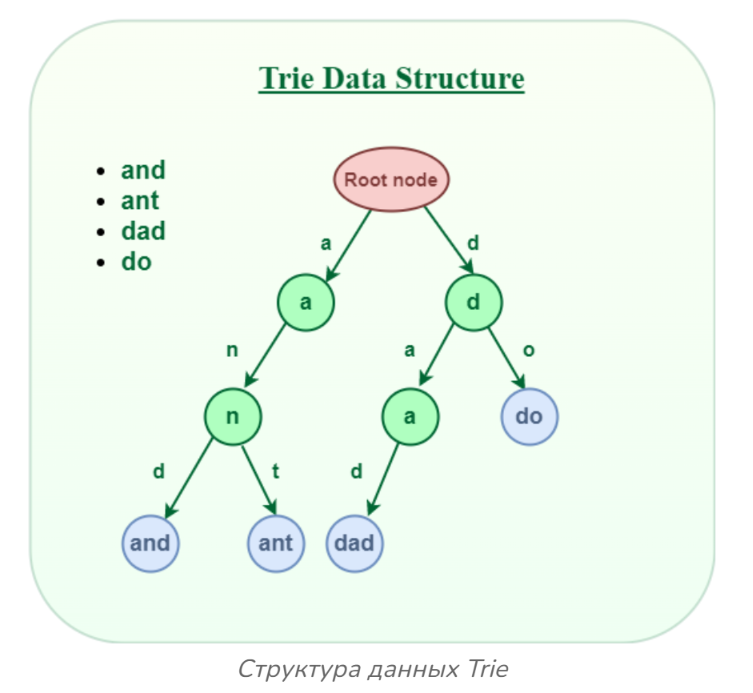

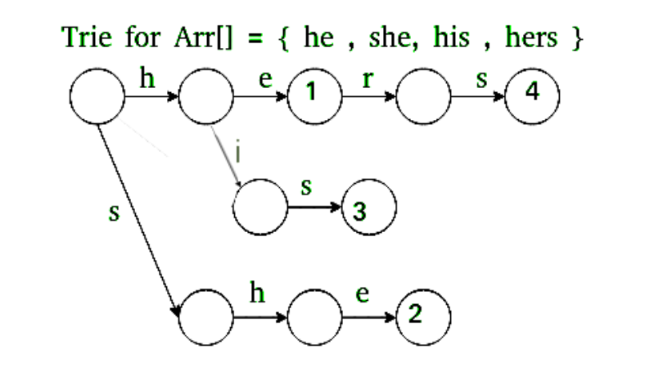

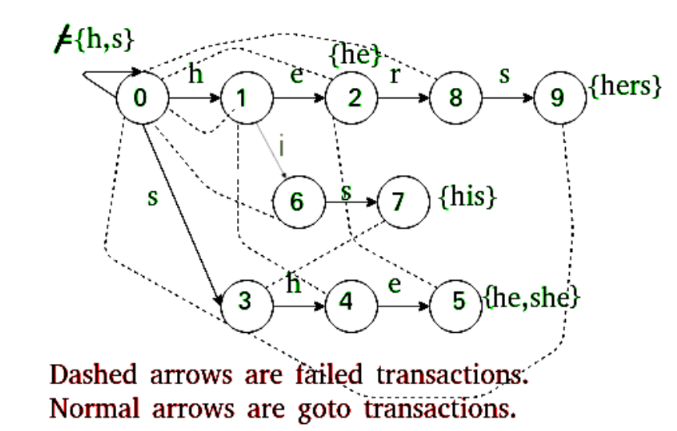

In [15]:
from collections import defaultdict

class AhoCorasick:
    def __init__(self, words):
        # Приводим все слова к нижнему регистру (поиск без учёта регистра)
        words = [word.lower() for word in words]
        self.words = words

        # Максимальное количество состояний — сумма длин всех слов
        self.max_states = sum(len(word) for word in words)
        self.alphabet_size = 26  # алфавит: английские буквы a-z

        # out[state] — битовая маска найденных слов в этом состоянии
        self.out = [0] * (self.max_states + 1)

        # fail[state] — переход по "неудаче", когда нет подходящего символа
        self.fail = [-1] * (self.max_states + 1)

        # goto[state][char] — основное дерево переходов (три)
        self.goto = [[-1] * self.alphabet_size for _ in range(self.max_states + 1)]

        # Построение автомата
        self.states_count = self._build_machine()

    def _build_machine(self):
        state = 1  # начальное количество состояний (0 — корень)

        # Строим дерево переходов (trie) по всем словам
        for i, word in enumerate(self.words):
            current = 0
            for ch in word:
                idx = ord(ch) - ord('a')
                if self.goto[current][idx] == -1:
                    self.goto[current][idx] = state
                    state += 1
                current = self.goto[current][idx]
            # Устанавливаем маску найденного слова
            self.out[current] |= (1 << i)

        # Все отсутствующие переходы из корня указывают на корень
        for ch in range(self.alphabet_size):
            if self.goto[0][ch] == -1:
                self.goto[0][ch] = 0

        # Инициализируем очередь для BFS по уровням
        queue = [self.goto[0][ch] for ch in range(self.alphabet_size) if self.goto[0][ch] != 0]
        for s in queue:
            self.fail[s] = 0

        # Строим функции перехода по "неудаче"
        while queue:
            current = queue.pop(0)
            for ch in range(self.alphabet_size):
                next_state = self.goto[current][ch]
                if next_state != -1:
                    # Ищем подходящее состояние по fail-переходам
                    f = self.fail[current]
                    while self.goto[f][ch] == -1:
                        f = self.fail[f]
                    self.fail[next_state] = self.goto[f][ch]
                    # Объединяем выходы (если несколько слов заканчиваются в этом состоянии)
                    self.out[next_state] |= self.out[self.fail[next_state]]
                    queue.append(next_state)

        return state  # Общее количество состояний

    def _next_state(self, current_state, ch):
        # Переход к следующему состоянию, с учётом fail-переходов
        idx = ord(ch) - ord('a')
        while self.goto[current_state][idx] == -1:
            current_state = self.fail[current_state]
        return self.goto[current_state][idx]

    def search(self, text):
        text = text.lower()
        current_state = 0
        result = defaultdict(list)

        # Проходим по всем символам текста
        for i, ch in enumerate(text):
            current_state = self._next_state(current_state, ch)

            # Если на этом состоянии есть совпадения — добавляем их в результат
            if self.out[current_state]:
                for j in range(len(self.words)):
                    if self.out[current_state] & (1 << j):
                        word = self.words[j]
                        start_index = i - len(word) + 1
                        result[word].append(start_index)
        return result

if __name__ == "__main__":
    words = ["he", "she", "hers", "his"]
    text = "ahishers"
    ac = AhoCorasick(words)
    matches = ac.search(text)

    # Выводим найденные совпадения
    for word, positions in matches.items():
        for start in positions:
            print(f"Слово '{word}' найдено с {start} по {start + len(word) - 1}")

Слово 'his' найдено с 1 по 3
Слово 'he' найдено с 4 по 5
Слово 'she' найдено с 3 по 5
Слово 'hers' найдено с 4 по 7
